## EDA E-commerce Analytics

Motivação: apresentar habilidades de DataViz com bibliotecas python 'seaborn' e 'matplotlib'.

OBS: como o foco é a visualização, não 

### Preparação do ambiente

In [1]:
# Imports
import pandas as pd
import seaborn as sns
from numpy import fill_diagonal
import matplotlib.pyplot as plt
from matplotlib import rc_params
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Área de plotagem

plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [3]:
# Função para explorar o diretório
import os
def listFile():
    diretorio = os.getcwd()
    if os.path.isdir(diretorio):
        arquivo = [arquivo for arquivo in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, arquivo))]
        for i in arquivo:
            print(i)

In [4]:
listFile()

dataset.csv
EDA E-commerce Analytics.ipynb
teste.mp3
teste.mp4


### Carga dos dados

In [5]:
# Carga
dados = pd.read_csv("dataset.csv")

In [6]:
# Visualização
dados.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
# Dimensões
dados.shape

(11000, 12)

In [8]:
# Metadados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Primeira parte - Gráficos estatísticos para análise uni e bivariada

### Análise

**Dados numéricos**

In [9]:
# Definindo labels das vairáveis numéricas
# ID será excluído da lista de labels por não representar informação numérica
# entregue_no_prazo será excluído por ser a variável target do futuro modelo - analisaremos separadamente

numercVars = dados.select_dtypes(include = 'int64').columns.drop(['ID', 'entregue_no_prazo'])
numercVars

Index(['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto',
       'compras_anteriores', 'desconto', 'peso_gramas'],
      dtype='object')

#### Univariada

In [10]:
# Estatísticas básicas
dados[numercVars].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


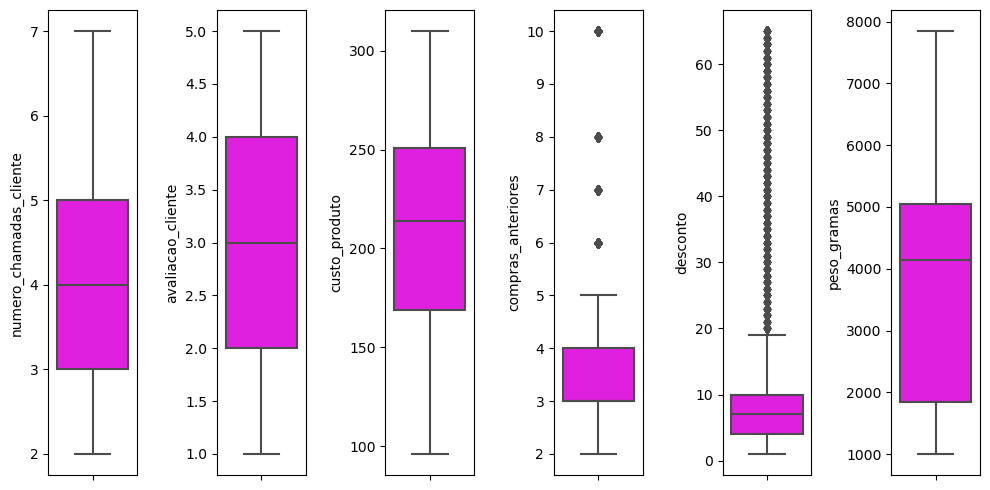

In [11]:
# Boxplot
for i, var in enumerate(numercVars):
    
    plt.subplot(1, len(numercVars), i + 1)
    
    sns.boxplot(y = dados[var], color = 'magenta', orient= 'v')
    
    plt.tight_layout()

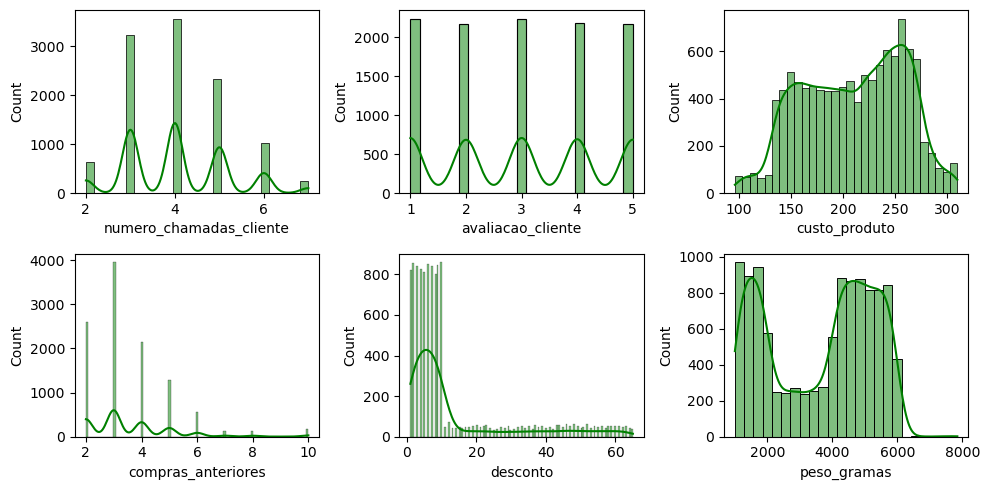

In [12]:
# Hitograma
for i, var in enumerate(numercVars):
    plt.subplot(2, int(len(numercVars)/ 2), i + 1)
    
    sns.histplot(dados[var], color = 'green', kde = True)
    
    plt.tight_layout()

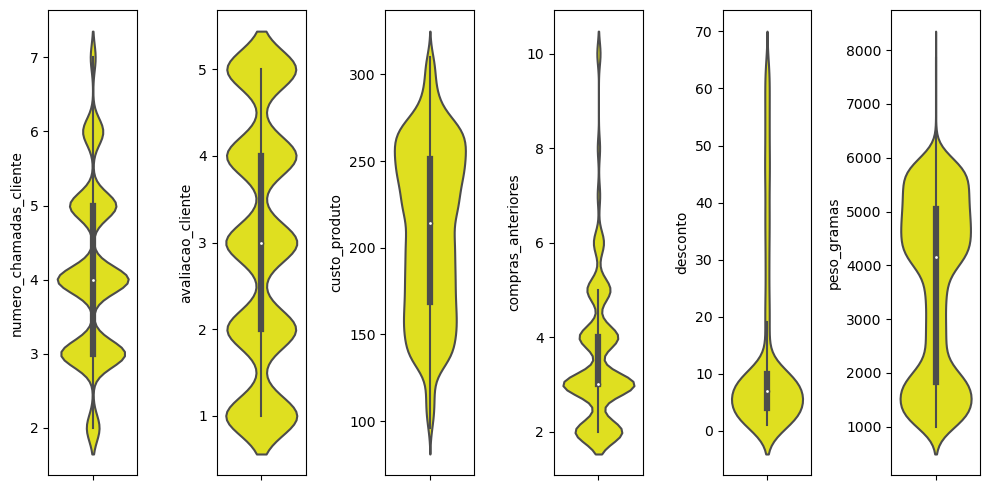

In [13]:
# ViolinPlot

for i, var in enumerate(numercVars):
    plt.subplot(1, len(numercVars), i + 1)
    
    sns.violinplot(y = dados[var], color = 'yellow')
    
    plt.tight_layout()

#### Bivariada

In [14]:
# Correlação
corr = dados[numercVars].corr()
corr

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


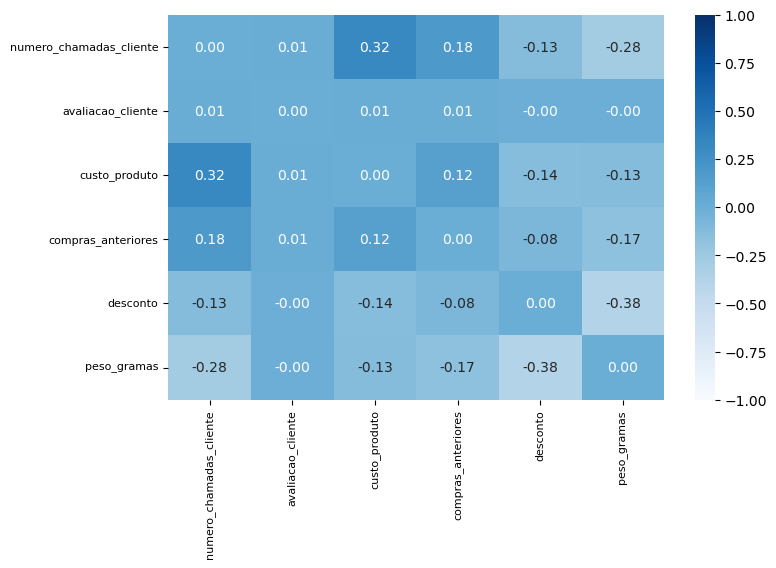

In [15]:
# Gráfico - mapa de calor
fill_diagonal(corr.values, 0)
plt.figure(figsize=(8,5))
sns.heatmap(data=corr, 
            annot= True, 
            cmap= "Blues", 
            fmt= '.2f', 
            vmax=1, 
            vmin=-1)
plt.xticks(size = 8)
plt.yticks(size = 8);

### Análise

**Dados categóricos**

In [16]:
categoricVar = dados.select_dtypes(include = 'object').columns
categoricVar

Index(['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero'], dtype='object')

**Univariada**

In [17]:
# Sumário estatístico
dados[categoricVar].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [18]:
# Valores únicos
for var in categoricVar:
    print("Frequência da variável: ", var)
    print(dados[var].value_counts())
    print("-------")

Frequência da variável:  corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64
-------
Frequência da variável:  modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64
-------
Frequência da variável:  prioridade_produto
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64
-------
Frequência da variável:  genero
F    5546
M    5454
Name: genero, dtype: int64
-------


**Gráficos**


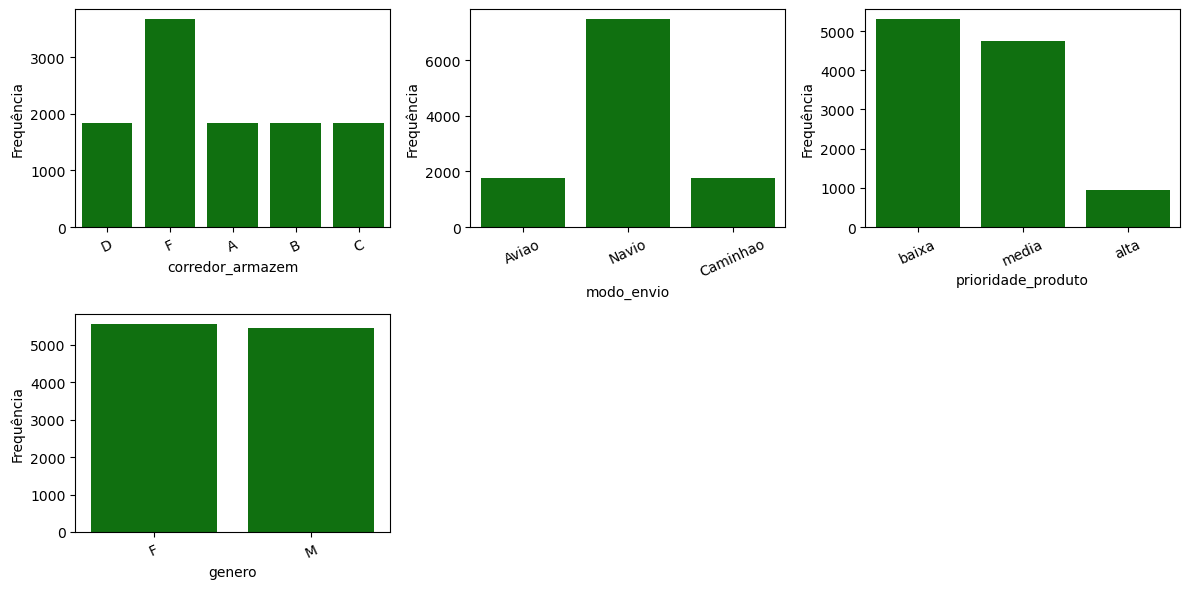

In [19]:
# Frequência das categorias
plt.figure(figsize=(12,6))
for i, var in enumerate(categoricVar):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = dados[var], color = 'green', orient= "v")
    plt.xticks(rotation = 25, size = 10)
    plt.ylabel("Frequência")
    plt.tight_layout()

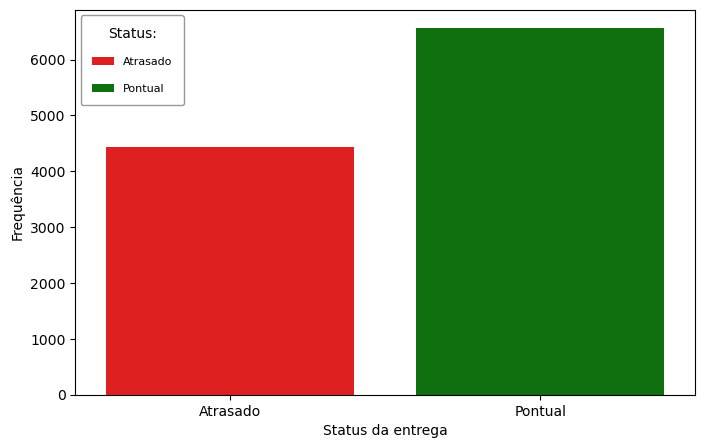

In [20]:
# Observação - variável alvo
plt.figure(figsize=(8,5))
ax = sns.countplot(data = dados, x = 'entregue_no_prazo', palette=["red", "green"])
plt.xlabel("Status da entrega")
ax.set_xticklabels(["Atrasado", "Pontual"])
plt.ylabel("Frequência")
ax.legend(title = "Status:", 
          title_fontsize = 10,
          handles = ax.patches, 
          labels = ['Atrasado', 'Pontual'],
          borderpad = 1,
          labelspacing = 1.5,
          fontsize = 8,
          edgecolor = 'gray');

**Bivariada**

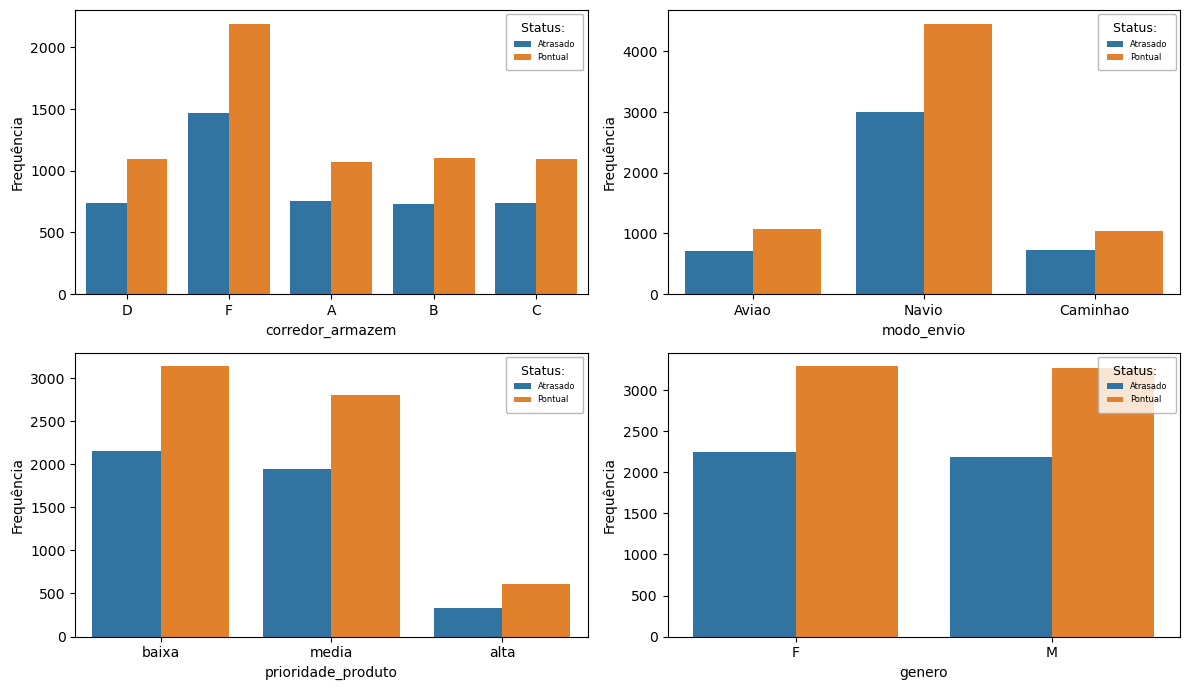

In [21]:
# gráficos
plt.figure(figsize=(12,7))
for i, var in enumerate(categoricVar):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data = dados, x = var, hue = 'entregue_no_prazo')
    plt.ylabel("Frequência")
    plt.legend(title = "Status: ",
               title_fontsize = 9,
              borderpad = 1,
              loc = 'upper right',
              labels=["Atrasado", "Pontual"],
              fontsize = 6,
              edgecolor = 'darkgray')
    plt.tight_layout()

### Segunda parte - Gráficos para BI

1 - Os atrasos nas entregas estão igualmente distribuídos pelos modo de envio. Há diferenças discrepantes.

 - Distribuição de atrasos por modo de entrega - em valores absolutos.

In [22]:
# labels das variávels
dados.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

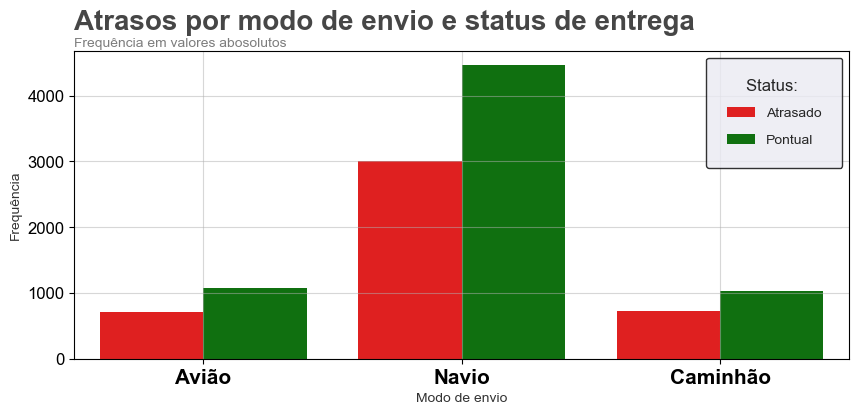

In [23]:
# Dimensões
plt.figure(figsize=(10,4))

# Gráficos
chart = sns.countplot(data = dados,
                     x = 'modo_envio',
                     hue = 'entregue_no_prazo',
                     palette=['red', 'green'])

# Ambiente
sns.set_style('whitegrid', 
                 {'grid.linestyle':':'})
chart.grid(alpha = 0.5)
sns.set(font_scale = 1.5)
sns.set_palette('prism')

# Eixos
chart.set_ylabel("Frequência", 
                 fontsize = 10, 
                 alpha = 0.8)

chart.set_xlabel("Modo de envio", 
                 fontsize = 10, 
                 alpha = 0.8)

chart.set_xticklabels(labels = ["Avião", "Navio", "Caminhão"],
                     size = 15,
                     weight = 'bold')

chart.tick_params(axis = 'y', labelsize = 12)


# Legenda
chart.legend(title = 'Status: ',
             title_fontsize = 12,
             labels = ["Atrasado", "Pontual"],
             fontsize = 10,
             borderpad = 1.5,
             labelspacing = 1,
             edgecolor = 'black')



# Título e subtítulo
chart.text(s = "Atrasos por modo de envio e status de entrega",
          x = -0.5,
          y = 5000,
          fontsize = 20,
          fontweight = 'bold',
          alpha = .85)


chart.text(s = "Frequência em valores abosolutos",
          x = -0.5,
          y = 4750,
          fontsize = 10,
          alpha = .60);

 - Distribuição de atrasos por modo de entrega - em valores relativos.

In [24]:
# Variáveis
dados.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [25]:
# Primeiro agrupamento
df1 = dados.groupby(['entregue_no_prazo', 'modo_envio'])['ID'].count().reset_index()
df1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [26]:
# Segundo agrupamento
df2 = dados.groupby('modo_envio').agg({'ID': 'nunique'}).reset_index()
df2

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [27]:
 # Join das tabelas

df3 = df1.merge(df2, on = 'modo_envio')
df3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [28]:
# Calculando valores
df3['relativo'] = df3['ID_x'] / df3['ID_y'] * 100
df3

,entregue_no_prazo,modo_envio,ID_x,ID_y,relativo
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [29]:
# Renomeando labels
df3.columns = ['Status da entrega',
               'Modo de envio',
               'Total por categoria',
               'Total status da entrega',
               'Percentual']

In [30]:
label_mapping = {
    '0': 'Atrasado',
    '1': 'Pontual'
}

# Replace the original labels with the new labels in the DataFrame
df3['Status da entrega'] = df3['Status da entrega'].replace(label_mapping)

In [31]:
df3

,Status da entrega,Modo de envio,Total por categoria,Total status da entrega,Percentual
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


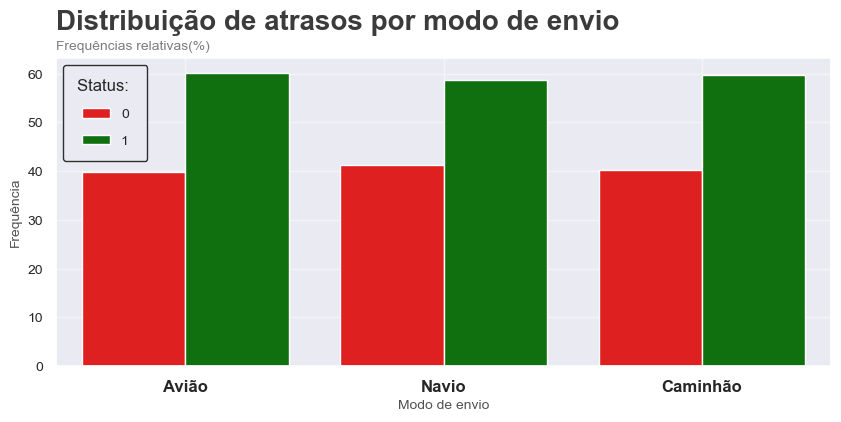

In [32]:
# Dimensões
plt.figure(figsize=(10,4))

# Gráficos
chart = sns.barplot(data = df3,
                     x = 'Modo de envio',
                     y = 'Percentual',
                     hue = 'Status da entrega',
                     palette=['red', 'green'])

# Ambiente
sns.set_style('whitegrid', 
                 {'grid.linestyle':':'})
chart.grid(alpha = 0.5)
sns.set(font_scale = 1.5)
sns.set_palette('prism')

# Eixos
chart.set_ylabel("Frequência", 
                 fontsize = 10, 
                 alpha = 0.8)

chart.set_xlabel("Modo de envio", 
                 fontsize = 10, 
                 alpha = 0.8)

chart.set_xticklabels(labels = ["Avião", "Navio", "Caminhão"],
                     size = 12,
                     weight = 'bold')

chart.tick_params(axis = 'y', labelsize = 10)


# Legenda
chart.legend(title = 'Status: ',
             title_fontsize = 12,
             loc = 'upper left',
             fontsize = 10,
             borderpad = 1,
             labelspacing = 1,
             edgecolor = 'black')



# Título e subtítulo
chart.text(s = "Distribuição de atrasos por modo de envio",
          x = -0.5,
          y = 69,
          fontsize = 20,
          weight = 'bold',
          alpha = 0.9),

chart.text(s = 'Frequências relativas(%)',
          x = -0.5,
          y = 65,
          fontsize = 10,
          alpha = 0.6);

2 - Há diferença significativa, no atraso, quando o produto tem prioridade baixa ou média?

In [33]:
# Visualizando variáveis
dados.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [34]:
# Primeiro df
df1 = dados.groupby(['entregue_no_prazo', 'prioridade_produto'])['ID'].count().reset_index()
df1

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [35]:
# df2 - prioridade
df2 = dados.groupby('prioridade_produto').agg({"ID": "nunique"}).reset_index()
df2

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [36]:
# Consolidando df
df3 = df1.merge(df2, on = 'prioridade_produto')
df3

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [37]:
# Calculando proporções e redefinindo labels das variaveis

df3['Percentual'] = df3['ID_x'] / df3['ID_y'] * 100

df3.columns = ['Status de entrega', 'Prioridade', 'Total por categoria', 'Total por entrega', 'Percentual']

df3

,Status de entrega,Prioridade,Total por categoria,Total por entrega,Percentual
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


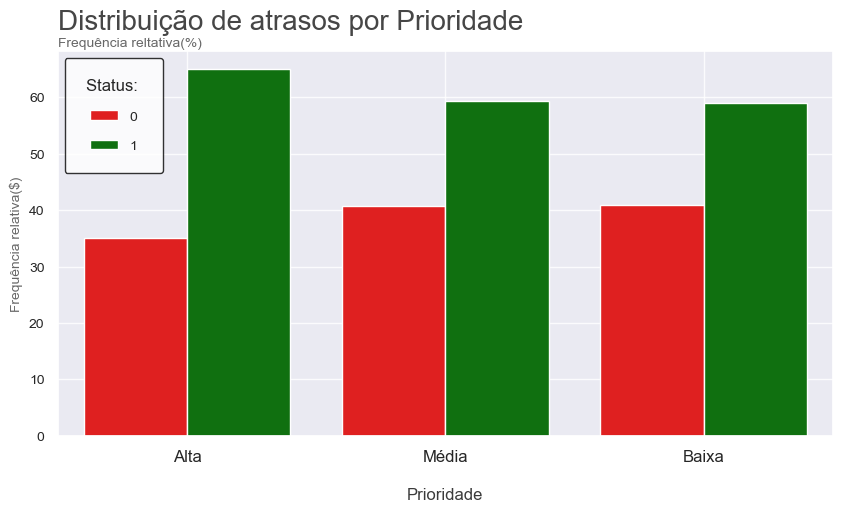

In [38]:
# dimensões
plt.figure(figsize=(10,5))


# grafico
chart = sns.barplot(data = df3,
                   x = 'Prioridade',
                   y = 'Percentual',
                   hue = 'Status de entrega',
                   palette = ['red', 'green'])

# ambiente
sns.set_style('whitegrid',
             {'grid.linestyle':"-"})
sns.set_palette('prism')
chart.grid(alpha = .85)



#eixos
chart.set_ylabel("Frequência relativa($)",
                size = 10,
                alpha = 0.7)
chart.tick_params(axis = 'y', labelsize = 10)


chart.set_xlabel("\nPrioridade",
                size = 12,
                alpha = .9)
chart.tick_params(axis = 'x', labelsize = 12)
chart.set_xticklabels(['Alta', 'Média', 'Baixa'])

#legenda
chart.legend(title = 'Status: ',
            title_fontsize = 12,
            fontsize = 10,
            borderpad = 1.5,
            labelspacing = 1.2,
            edgecolor = 'black')


#titulo
chart.text(s = "Distribuição de atrasos por Prioridade",
          y = 72,
          x = -0.5,
          fontsize = 20,
          alpha = .85)

chart.text(s = "Frequência reltativa(%)",
          x = -0.5,
          y = 69,
          fontsize = 10,
          alpha = .7);

3 - Quais corredores armazenam produtos com maior proporção de entrega com atraso?

In [39]:
# Labels das variáveis
dados.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [40]:
# df1
df1 = dados.groupby(["entregue_no_prazo", 'corredor_armazem'])['ID'].count().reset_index()
df1

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [45]:
# df2 - Corredor
df2 = dados.groupby('corredor_armazem').agg({"ID": "nunique"}).reset_index()
df2

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [46]:
# Consolidando dataset
df3 = df1.merge(df2, on = 'corredor_armazem')

#Proporções
df3['Percentual'] = df3['ID_x'] / df3['ID_y'] * 100


In [48]:
# Labels da variáveis

df3.columns = ['Status da entrega',
               'Corredor de armazenagem',
               'Total por categoria',
               'Total por corredor',
               'Percentual']

Text(-0.5, 65, 'Frequência relativa(%)')

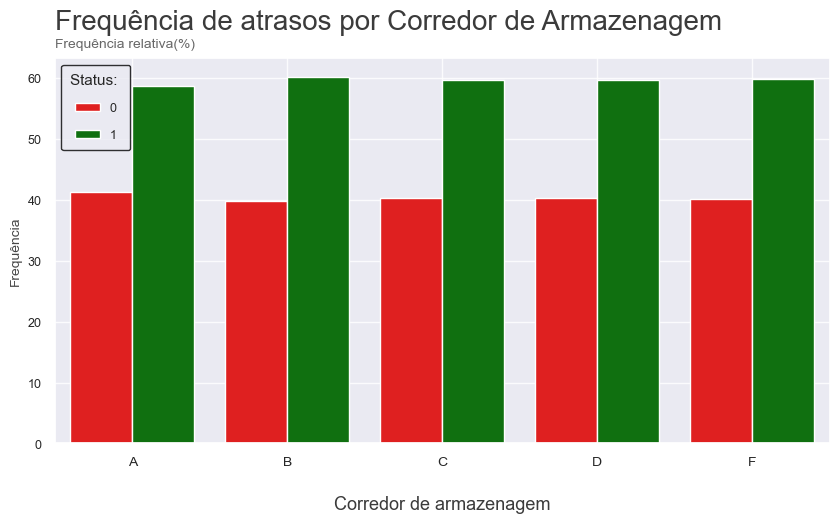

In [72]:
# Dimensões
plt.figure(figsize=(10,5))

# grafico
chart = sns.barplot(data = df3,
                   x = 'Corredor de armazenagem',
                   y = 'Percentual',
                   hue = 'Status da entrega',
                   palette = ['red', 'green'])

# ambiente
sns.set_style('whitegrid',
             {'grid.linestyle':':'})
sns.set(font_scale = 1.5)
sns.set_palette('prism')
chart.grid(alpha = .85)


#eixos
chart.set_xlabel('\nCorredor de armazenagem',
                fontsize = 13,
                alpha = .9)
chart.tick_params(axis = 'x', labelsize = 10)

chart.set_ylabel("Frequência",
                fontsize = 10,
                alpha = .85)
chart.tick_params(axis = 'y', labelsize = 9)


#legendas
chart.legend(title = 'Status: ',
            title_fontsize = 11,
            fontsize = 9,
            loc = 'upper left',
            borderpad = .7,
            labelspacing = 1.2,
            edgecolor = 'black')



#titulo
chart.text(s = "Frequência de atrasos por Corredor de Armazenagem",
          x = -0.5,
          y = 68,
          fontsize = 20,
          alpha = .9)


chart.text(s = "Frequência relativa(%)",
          x = -0.5,
          y = 65,
          fontsize = 10,
          alpha = .7)

4 - Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

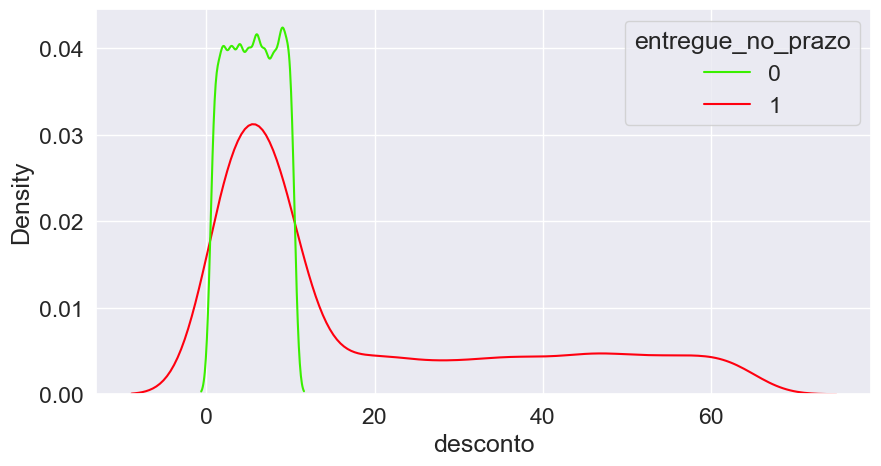

In [74]:
# kdeplot
sns.kdeplot(data = dados, x = 'desconto', hue = 'entregue_no_prazo');

- 0 = distribuição dos descontos quando houve atraso
- 1 =  quando não houve

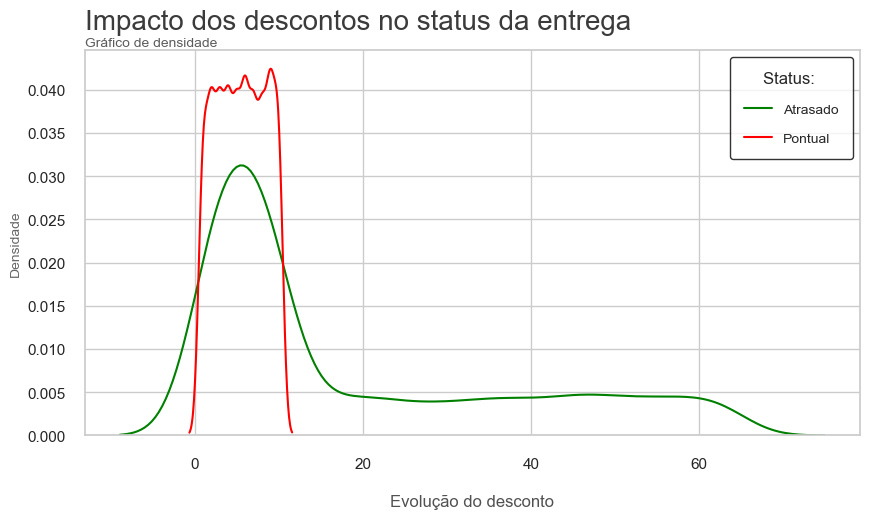

In [109]:
# dimensoes
plt.figure(figsize=(10,5))

# grafico
chart = sns.kdeplot(data = dados,
                   x = 'desconto',
                   hue = 'entregue_no_prazo',
                   palette=['red', 'green'])

#ambiente
sns.set_style('whitegrid')

# Legenda
chart.legend(title = 'Status: ',
            title_fontsize = 12,
            labels = ["Atrasado", "Pontual"],
            fontsize = 10,
            borderpad = 1,
            labelspacing = 1.2,
            edgecolor = 'black')

#eixos
chart.set_xlabel("\nEvolução do desconto",
                fontsize = 12,
                alpha = .8)
chart.tick_params(axis = 'x',
                 size = 12)

chart.set_ylabel("Densidade",
                fontsize = 10,
                alpha = .7)
chart.tick_params(axis = 'y', size = 10)

#titulos
chart.text(s = "Impacto dos descontos no status da entrega",
          x = -13,
          y = 0.047,
          fontsize = 20,
          alpha = .90)

chart.text(s = "Gráfico de densidade",
          x = -13,
          y = 0.045,
          fontsize = 10,
          alpha = .75);